# **Image Classification using CNN Architectures- Assignment**

**Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?**

A Convolutional Neural Network (CNN) is a type of deep learning model designed to automatically and efficiently detect spatial patterns in grid-like data, such as images, using convolutional layers to learn hierarchical features.

Unlike traditional fully connected neural networks (FCNNs) that flatten images, CNNs leverage local connectivity, parameter sharing, and pooling to outperform FCNNs in image tasks.

**Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.**

LeNet-5 introduced by Yann LeCun et al. in 1998 for handwritten digit recognition, is a 7-layer convolutional neural network (CNN) that established the foundational architecture for modern computer vision, including alternating convolutional and average pooling layers (subsampling) followed by fully connected layers.

It pioneered the use of backpropagation for training convolutional filters to automatically extract hierarchical features(edges, shapes).

**Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.**

AlexNet (2012) pioneered deep learning using a shallow 8-layer architecture with large, varied kernels (up to 11x11) and roughly 60 million parameters.

VGGNet (2014) prioritized depth (16–19 layers) using a uniform design of stacked 3x3 filters. While VGG offers superior accuracy, its high parameter count (~138 million) makes it significantly more computationally expensive than AlexNet.

**AlexNet (2012)**

**Innovations:**

ReLU Activation

GPU Training

**Limitations:**

Irregular Architecture

Shallow Depth

Poor Scaling

**VGGNet (2014)**

**Innovations:**

Uniform Design

Depth and Receptive Field

Pre-initialization

**Limitations:**

Extreme Parameter Density

Computational Cost

Vanishing Gradients

**Question 4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.**


Transfer learning in the context of image classification is a machine learning technique where a model trained for one task is reused as the starting point for another, related task.

In image classification, this typically involves using a pre-trained model (like one trained on a massive dataset such as ImageNet) as the foundation for a new, specific image classification problem.

Training a high-performing deep learning model from scratch is computationally expensive and time-consuming, requiring powerful hardware and large amounts of energy.

Deep learning models for image classification usually require large datasets to generalize well and avoid overfitting. Transfer learning is highly effective when data is limited.

**Question 5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?**

Residual connections (or skip connections) in ResNet architectures act as shortcuts, allowing the gradient to skip one or more convolutional layers during backpropagation.

They directly address the vanishing gradient problem in deep CNNs by providing a "highway" for information flow, enabling gradients to reach earlier layers without shrinking exponentially.

By implementing \(y=F(x)+x\), where \(x\) is the input and \(F(x)\) is the residual mapping, these connections ensure that even if the weight layers (\(F(x)\)) have small gradients, the gradient can still flow back through the identity path (\(x\)), facilitating the training of extremely deep networks.

**Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST data (pad to 32x32 as needed in original paper)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]])  # Pad to 32x32
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]])
x_train = tf.cast(x_train, tf.float32) / 255.0  # Cast to float32 before division
x_test = tf.cast(x_test, tf.float32) / 255.0    # Cast to float32 before division
x_train = tf.expand_dims(x_train, axis=3) # Add channel dimension
x_test = tf.expand_dims(x_test, axis=3)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the LeNet-5 model
model = Sequential([
    # C1 Convolutional Layer
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)),
    # S2 Subsampling Layer
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    # C3 Convolutional Layer
    Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    # S4 Subsampling Layer
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    # Flatten Layer
    Flatten(),
    # C5 Fully Connected Convolutional Layer
    Dense(units=120, activation='tanh'),
    # F6 Fully Connected Layer
    Dense(units=84, activation='tanh'),
    # Output Layer
    Dense(units=10, activation='softmax')
])

# Compile and train the model (optimizer and epochs can vary for best results)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8339 - loss: 0.6018 - val_accuracy: 0.9543 - val_loss: 0.1466
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9566 - loss: 0.1412 - val_accuracy: 0.9689 - val_loss: 0.0983
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.0920 - val_accuracy: 0.9777 - val_loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0623 - val_accuracy: 0.9811 - val_loss: 0.0565
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9841 - val_loss: 0.0499
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9818 - val_loss: 0.0544
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9894 - loss: 0.0323 - val_accuracy: 0.9840 - val_loss: 0.0495
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 

**Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model. Include your code and result discussion.**

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model from Keras applications
model1 = VGG16(weights='imagenet')

# Display model summary
model1.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Prediction Function
def predict_image(model, image_path):
    """
    Predicts the class of the given image using the VGG16 model.

    Args:
        model: Pre-trained VGG16 model.
        image_path: Path to the image file.

    Returns:
        Top predictions as a list of (class, description, score).
    """
    # Load the image with the required target size for VGG16
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Add a batch dimension (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

     # Preprocess the image for VGG16
    img_array = preprocess_input(img_array)

    # Predict the image class
    predictions = model.predict(img_array)

    # Decode the predictions into readable labels
    decoded_predictions = decode_predictions(predictions, top=5)  # Top 5 predictions
    return decoded_predictions[0]

In [15]:
import requests

def download_image(url, save_path):
    """
    Downloads an image from a given URL and saves it to a specified path.

    Args:
        url: The URL of the image.
        save_path: The path where the image will be saved.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
        with open(save_path, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        print(f"Image downloaded successfully to {save_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")

In [16]:
# Example usage:
image_url = "https://cdn.britannica.com/02/162502-050-FEEA94DE/Vulture.jpg"
output_filename = "vulture.jpg"
download_image(image_url, output_filename)

Image downloaded successfully to vulture.jpg


In [17]:
# Sample Image Prediction
sample_image_path = '/content/vulture.jpg'  # Replace with the path to your image

# Predict the image class
predictions = predict_image(model1, sample_image_path)

# Display the predictions
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions:
1: vulture (1.00)
2: bald_eagle (0.00)
3: kite (0.00)
4: hornbill (0.00)
5: white_stork (0.00)


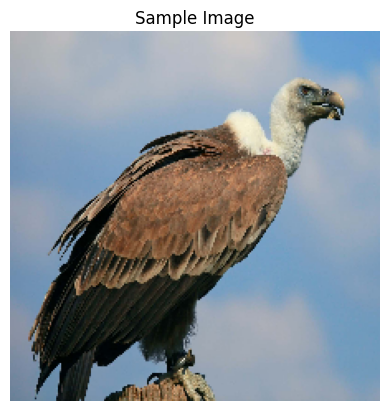

In [18]:
# Visualize the sample image
img = load_img(sample_image_path, target_size=(224, 224))
plt.imshow(img)
plt.title("Sample Image")
plt.axis('off')
plt.show()

**Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.**

First Convolutional Layer: Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

Visualizing Filters...


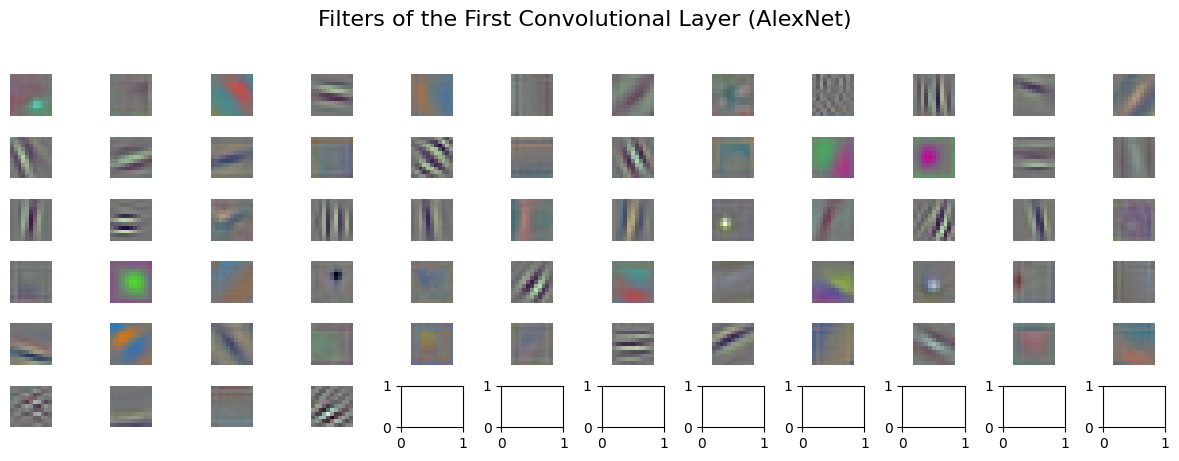


Visualizing Feature Maps...


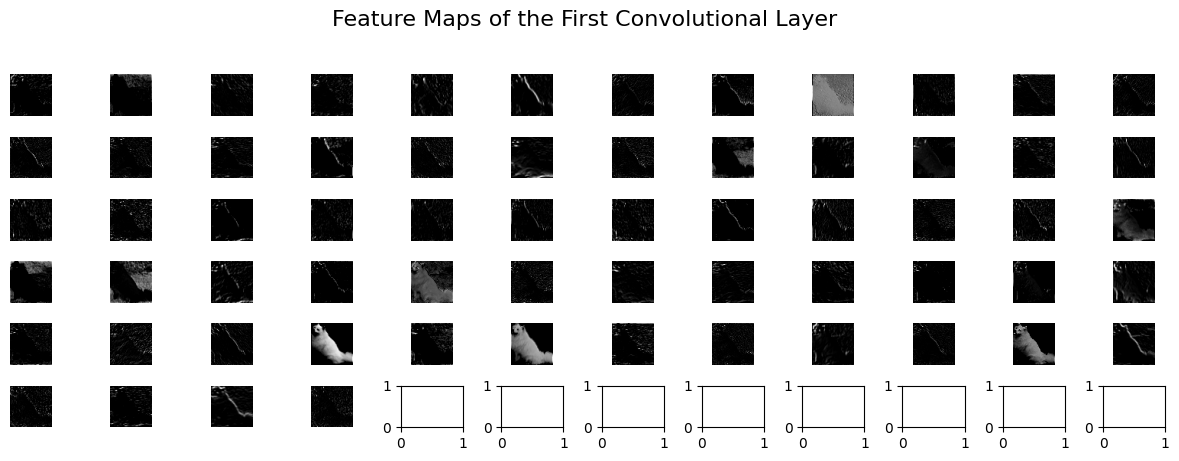

In [7]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Load a pre-trained AlexNet model
alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
# Set model to evaluation mode
alexnet.eval()

# The first convolutional layer is the first element in the 'features' module
first_conv_layer = alexnet.features[0]
print(f"First Convolutional Layer: {first_conv_layer}")

# 2. Load and preprocess an example image
# Download an example image (e.g., a dog image from the PyTorch examples)
import urllib.request
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try:
    urllib.request.urlretrieve(url, filename)
except:
    # Fallback for different environments if the above fails
    print("Could not download image via urllib.request.urlretrieve. Ensure you have a 'dog.jpg' in your directory.")

input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # AlexNet was trained with specific normalization
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
# Add a batch dimension (models expect input in batches)
input_batch = input_tensor.unsqueeze(0)

# 3. Visualize the filters (weights) of the first convolutional layer

def visualize_filters(layer, num_filters, cols=12):
    weights = layer.weight.data.clone().cpu()
    # Normalize weights to be in range [0, 1] for visualization
    weights = weights - weights.min()
    weights = weights / weights.max()

    rows = int(np.ceil(num_filters / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows * 0.8))
    fig.suptitle('Filters of the First Convolutional Layer (AlexNet)', fontsize=16)

    for i in range(num_filters):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        # Channels are combined into one RGB image
        ax.imshow(weights[i].permute(1, 2, 0))
        ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 4. Visualize the feature maps (activations) produced by the layer

def visualize_feature_maps(model, input_batch, layer_index=0, num_maps=96, cols=12):
    # Register a hook to capture the output of the layer
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    # The first conv layer is alexnet.features[0]
    handle = model.features[layer_index].register_forward_hook(get_activation('conv1'))

    # Run the forward pass
    with torch.no_grad():
        model(input_batch)

    # Get the feature maps
    feature_maps = activation['conv1'].squeeze(0).cpu().numpy()
    handle.remove()

    rows = int(np.ceil(num_maps / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows * 0.8))
    fig.suptitle('Feature Maps of the First Convolutional Layer', fontsize=16)

    for i in range(num_maps):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        # Display each feature map in grayscale
        ax.imshow(feature_maps[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Run the visualizations
num_filters_in_layer = first_conv_layer.out_channels # Get the actual number of filters
print("\nVisualizing Filters...")
visualize_filters(first_conv_layer, num_filters=num_filters_in_layer)

print("\nVisualizing Feature Maps...")
visualize_feature_maps(alexnet, input_batch, num_maps=num_filters_in_layer)

**Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
def inception_module(x, filters):
    f1, f3_reduce, f3, f5_reduce, f5, pool_proj = filters

    path1 = layers.Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    path2 = layers.Conv2D(f3_reduce, (1,1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3, (3,3), padding='same', activation='relu')(path2)

    path3 = layers.Conv2D(f5_reduce, (1,1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5, (5,5), padding='same', activation='relu')(path3)

    path4 = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1,1), padding='same', activation='relu')(path4)

    return layers.concatenate([path1, path2, path3, path4])

In [4]:
inputs = layers.Input(shape=(32,32,3))

x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)

x = inception_module(x, [32, 32, 64, 8, 16, 16])
x = inception_module(x, [64, 48, 96, 12, 24, 24])

x = layers.MaxPooling2D((2,2))(x)

x = inception_module(x, [64, 64, 128, 16, 32, 32])
x = inception_module(x, [128, 96, 192, 24, 48, 48])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.4068 - loss: 1.5791 - val_accuracy: 0.4752 - val_loss: 1.4033
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5239 - loss: 1.2905 - val_accuracy: 0.5787 - val_loss: 1.1494
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5996 - loss: 1.1112 - val_accuracy: 0.6392 - val_loss: 0.9995
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6449 - loss: 0.9941 - val_accuracy: 0.6755 - val_loss: 0.9115
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.6834 - loss: 0.8942 - val_accuracy: 0.7062 - val_loss: 0.8313
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7118 - loss: 0.8212 - val_accuracy: 0.7263 - val_loss: 0.7713
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7324 - loss: 0.7574 - val_accuracy: 0.7339 - val_loss: 0.7634
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7561 - loss: 0.6837 - 

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7732 - loss: 1.0421
Test Accuracy: 0.7681000232696533


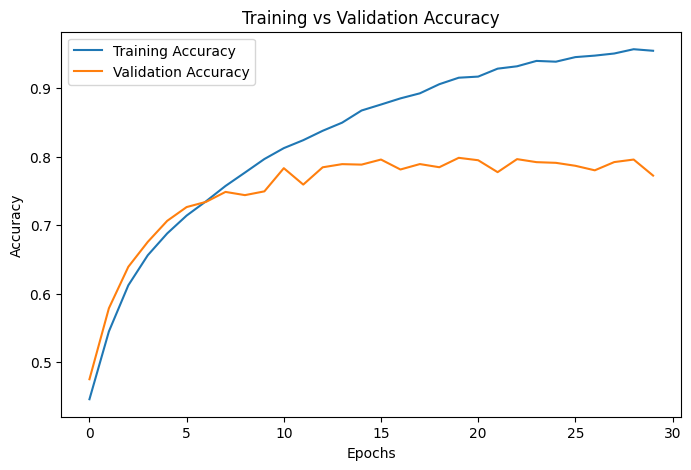

In [9]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

**Question 10: You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.**

In a scenario with limited labeled data for classifying medical X-ray images, I would recommend utilizing a transfer learning approach with a pre-trained ResNet or Inception variant. These architectures, pre-trained on large datasets like ImageNet, have already learned robust, generalizable features such as edges and textures. By fine-tuning the final layers on the specific X-ray dataset, we can leverage these existing features and adapt them to the target classes (normal, pneumonia, COVID-19) much more effectively than training a complex model from scratch, thus mitigating the risks of overfitting and poor generalization inherent with small datasets. The depth and residual connections of ResNet, and the multi-scale processing of Inception, are particularly effective for capturing the varied visual patterns present in medical images.

For deployment into production, the model would be containerized using Docker for consistent execution across different environments. It would then be deployed as a microservice on a cloud platform (like AWS, Azure, or GCP) behind a secure API, allowing the front-end interface (e.g., a hospital's EHR system or a web portal) to submit X-ray images and receive the classification results as JSON responses. A continuous monitoring system using tools like Prometheus and Grafana would be implemented to track the model's inference time, error rates, and potential data drift, ensuring ongoing performance and reliability in a clinical setting.